In [1]:
import numpy as np

GDP = np.array([43151647003, 57123671734, 81003884545, 1.0485E+11, 1.33442E+11, 1.15309E+11, 
                1.48047E+11, 1.92627E+11, 2.07999E+11, 2.36635E+11, 2.21416E+11, 1.84388E+11, 
                1.37278E+11, 1.66806E+11, 1.7934E+11, 1.81667E+11, 1.71082E+11, 1.97112E+11, 
                2.20495E+11])

inflation_rate = np.array([0.0688, 0.0758, 0.0872, 0.1085, 0.1714, 0.0732, 0.074, 0.0842, 
                           0.051, 0.0585, 0.0671, 0.0667, 0.1455, 0.0744, 0.0602, 0.0525, 
                           0.0675, 0.08, 0.203])

production = np.array([2.647203315, 2.833078056, 2.924707228, 3.040792351, 3.01696266, 
                       3.244222215, 3.394558458, 3.45714065, 3.392932546, 3.499920042, 
                       3.629783129, 3.692041199, 3.584883791, 3.964865605, 4.149895762, 
                       4.150441347, 3.933291107, 3.930674581, 4.250786348])

consumption = np.array([0.384390744, 0.416543317, 0.43681608, 0.466726143, 0.53680021, 
                        0.407592473, 0.478710469, 0.553139883, 0.502244584, 0.507464084, 
                        0.504762304, 0.641371174, 0.68114193, 0.680664787, 0.641846461, 
                        0.626333032, 0.577749817, 0.581853434, 0.672511896])

oil_prices = np.array([43.36, 61.06, 60.85, 95.95, 44.6, 79.39, 91.38,
                       98.83, 91.83, 98.17, 53.45, 37.13, 53.75, 60.46,
                       45.15, 61.14, 48.52, 75.21, 80.51])


---

# GDP

In [2]:
import pandas as pd
import numpy as np
# Create a list of years from 2004 to 2022
years = pd.date_range(start='2004', end='2023', freq='Y').year

GDP = np.array([43151647003, 57123671734, 81003884545, 1.0485E+11, 1.33442E+11, 1.15309E+11, 
                1.48047E+11, 1.92627E+11, 2.07999E+11, 2.36635E+11, 2.21416E+11, 1.84388E+11, 
                1.37278E+11, 1.66806E+11, 1.7934E+11, 1.81667E+11, 1.71082E+11, 1.97112E+11, 
                2.20495E+11])

# Create a DataFrame with 'year' as 'ds' and 'oil_prices' as 'y'
data = pd.DataFrame({'ds': pd.to_datetime(years, format='%Y'), 'y': GDP})

from prophet import Prophet

# Instantiate the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Create a DataFrame with future dates (2023-2032)
future = model.make_future_dataframe(periods=10, freq='Y')

# Make predictions for the next 10 years (2023-2032)
forecast = model.predict(future)

# Extract the predicted oil prices
predicted_gdp = forecast.loc[forecast['ds'].dt.year > 2022, 'yhat']

# Print the predictions
print("Predicted GDP prices for 2023-2032:")
for year, GDP in zip(range(2023, 2033), GDP):
    print(f"{year}: {GDP}")

08:11:32 - cmdstanpy - INFO - Chain [1] start processing
08:11:32 - cmdstanpy - INFO - Chain [1] done processing


Predicted GDP prices for 2023-2032:
2023: 43151647003.0
2024: 57123671734.0
2025: 81003884545.0
2026: 104850000000.0
2027: 133442000000.0
2028: 115309000000.0
2029: 148047000000.0
2030: 192627000000.0
2031: 207999000000.0
2032: 236635000000.0


08:14:29 - cmdstanpy - INFO - Chain [1] start processing
08:14:29 - cmdstanpy - INFO - Chain [1] done processing


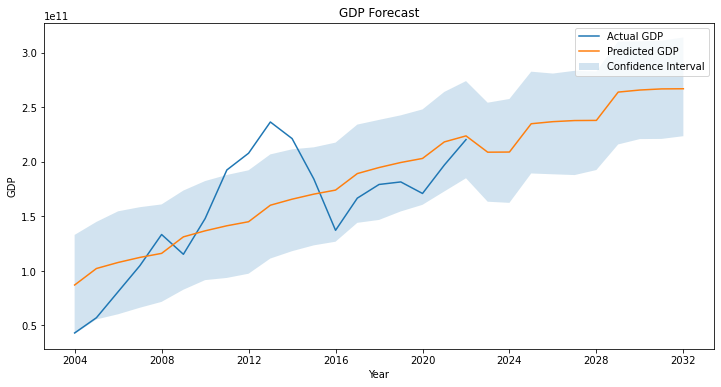

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Create a list of years from 2004 to 2022
years = pd.date_range(start='2004', end='2023', freq='Y').year

GDP = np.array([43151647003, 57123671734, 81003884545, 1.0485E+11, 1.33442E+11, 1.15309E+11, 
                1.48047E+11, 1.92627E+11, 2.07999E+11, 2.36635E+11, 2.21416E+11, 1.84388E+11, 
                1.37278E+11, 1.66806E+11, 1.7934E+11, 1.81667E+11, 1.71082E+11, 1.97112E+11, 
                2.20495E+11])

# Create a DataFrame with 'year' as 'ds' and 'GDP' as 'y'
data = pd.DataFrame({'ds': pd.to_datetime(years, format='%Y'), 'y': GDP})

# Instantiate the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Create a DataFrame with future dates (2023-2032)
future = model.make_future_dataframe(periods=10, freq='Y')

# Make predictions for the next 10 years (2023-2032)
forecast = model.predict(future)

# Plot the actual and predicted GDP values
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual GDP')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted GDP')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, label='Confidence Interval')
plt.title('GDP Forecast')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()


---

# Production

In [3]:
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt

# Separate production and consumption data
production = np.array([2.647203315, 2.833078056, 2.924707228, 3.040792351, 3.01696266,
                       3.244222215, 3.394558458, 3.45714065, 3.392932546, 3.499920042,
                       3.629783129, 3.692041199, 3.584883791, 3.964865605, 4.149895762,
                       4.150441347, 3.933291107, 3.930674581, 4.250786348])

# Fit the ARIMA model with auto_arima for grid search
production_model = pm.auto_arima(production, seasonal=False, stepwise=True,
                                 suppress_warnings=True, max_order=None,
                                 trace=True, error_action='ignore')

# Make predictions for the next 10 years (2023-2032)
production_forecast = production_model.predict(n_periods=10)

# Print the predictions
print("Predicted production values for 2023-2032:")
for year, production in zip(range(2023, 2033), production_forecast):
    print(f"{year}: {production}")

# Get the residuals
production_residuals = production_model.resid()


C:\Users\Anton\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14.922, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12.935, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11.023, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11.100, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.234 seconds
Predicted production values for 2023-2032:
2023: 4.339873924848752
2024: 4.428961501697504
2025: 4.518049078546256
2026: 4.607136655395008
2027: 4.69622423224376
2028: 4.785311809092512
2029: 4.874399385941264
2030: 4.963486962790016
2031: 5.052574539638768
2032: 5.14166211648752


---

# Inflation Rate

In [5]:
import pandas as pd
import numpy as np
from prophet import Prophet

# GDP data
inflation_rate = np.array([0.0688, 0.0758, 0.0872, 0.1085, 0.1714, 0.0732, 0.074, 0.0842, 0.051, 0.0585, 0.0671, 0.0667, 0.1455, 0.0744, 0.0602, 0.0525, 0.0675, 0.08, 0.203])


# Create a list of years from 2004 to 2022
years = pd.date_range(start='2004', end='2023', freq='Y').year

# Create a DataFrame with 'year' as 'ds' and 'gdp' as 'y'
data = pd.DataFrame({'ds': pd.to_datetime(years, format='%Y'), 'y': inflation_rate})

# Instantiate the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Create a DataFrame with future dates (2023-2032)
future = model.make_future_dataframe(periods=10, freq='Y')

# Make predictions for the next 10 years (2023-2032)
forecast = model.predict(future)

# Extract the predicted GDP values
inflation_rate_pred = forecast.loc[forecast['ds'].dt.year > 2022, 'yhat']

# Print the predictions
print("Predicted inflation_rate for 2023-2032:")
for year, inflation_rate in zip(range(2023, 2033), inflation_rate_pred):
    print(f"{year}: {inflation_rate:.4f}")


08:11:34 - cmdstanpy - INFO - Chain [1] start processing
08:11:34 - cmdstanpy - INFO - Chain [1] done processing


Predicted inflation_rate for 2023-2032:
2023: 0.1344
2024: 0.1157
2025: 0.1232
2026: 0.1306
2027: 0.1377
2028: 0.1190
2029: 0.1265
2030: 0.1339
2031: 0.1410


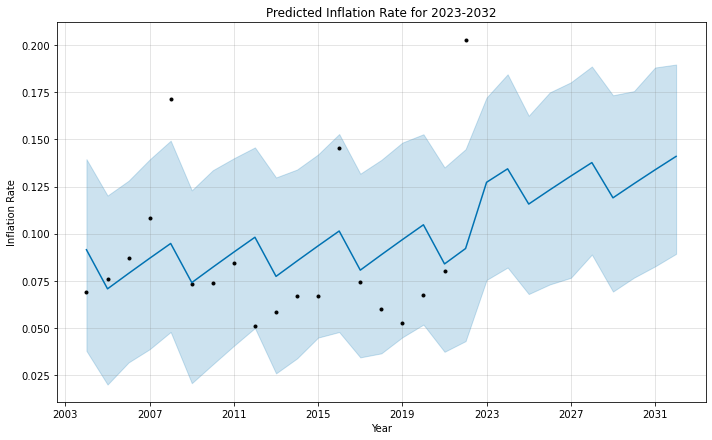

In [6]:
import matplotlib.pyplot as plt

# Plot the predicted values
fig = model.plot(forecast)

# Add a title and axis labels
plt.title("Predicted Inflation Rate for 2023-2032")
plt.xlabel("Year")
plt.ylabel("Inflation Rate")

# Show the plot
plt.show()


---

# Consumption

In [7]:
import pandas as pd
import numpy as np
from prophet import Prophet

# GDP data
consumption = np.array([0.384390744, 0.416543317, 0.43681608, 0.466726143, 0.53680021, 
                        0.407592473, 0.478710469, 0.553139883, 0.502244584, 0.507464084, 
                        0.504762304, 0.641371174, 0.68114193, 0.680664787, 0.641846461, 
                        0.626333032, 0.577749817, 0.581853434, 0.672511896])

# Create a list of years from 2004 to 2022
years = pd.date_range(start='2004', end='2023', freq='Y').year

# Create a DataFrame with 'year' as 'ds' and 'gdp' as 'y'
data = pd.DataFrame({'ds': pd.to_datetime(years, format='%Y'), 'y': consumption})

# Instantiate the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Create a DataFrame with future dates (2023-2032)
future = model.make_future_dataframe(periods=10, freq='Y')

# Make predictions for the next 10 years (2023-2032)
forecast = model.predict(future)

# Extract the predicted GDP values
consumption_pred = forecast.loc[forecast['ds'].dt.year > 2022, 'yhat']

# Print the predictions
print("Predicted consumption for 2023-2032:")
for year, consumption in zip(range(2023, 2033), consumption_pred):
    print(f"{year}: {consumption:.4f}")



08:11:34 - cmdstanpy - INFO - Chain [1] start processing
08:11:34 - cmdstanpy - INFO - Chain [1] done processing


Predicted consumption for 2023-2032:
2023: 0.7148
2024: 0.7411
2025: 0.7562
2026: 0.7670
2027: 0.7735
2028: 0.7998
2029: 0.8149
2030: 0.8257
2031: 0.8323


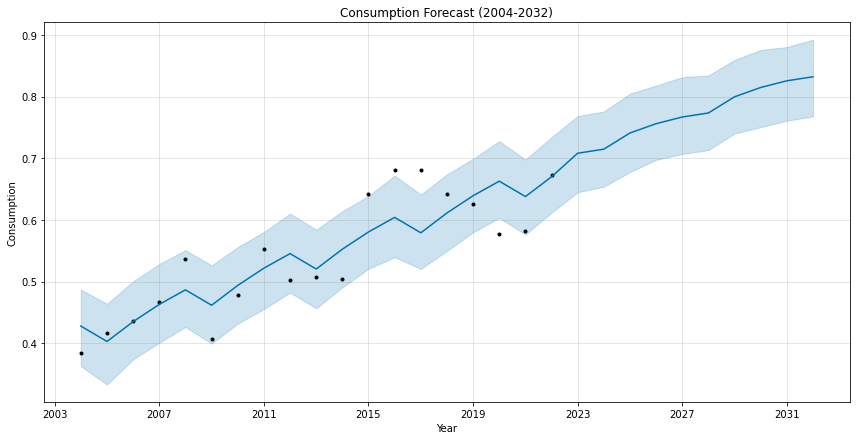

In [8]:
import matplotlib.pyplot as plt

# Plot the forecast
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)

# Set the plot title and axis labels
plt.title('Consumption Forecast (2004-2032)')
plt.xlabel('Year')
plt.ylabel('Consumption')

# Display the plot
plt.show()

---

# Oil prices

In [9]:

# Oil price data
oil_prices = np.array([43.36, 61.06, 60.85, 95.95, 44.6, 79.39, 91.38,
                       98.83, 91.83, 98.17, 53.45, 37.13, 53.75, 60.46,
                       45.15, 61.14, 48.52, 75.21, 80.51])

oil = np.array([78.86363632, 69.36307382, 61.35249017, 58.57965255, 65.39135395,
68.05087201, 70.13219977, 73.23240476, 75.0035104])

years = np.array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031])